# Stock Trend Prediction Using Random Forest (TOBA)

### Project Overview

For this project, I am using TOBA stock data to predict stock price trends using the random forest algorithm. The dataset includes columns such as Date, Open, High, Low, Close, Adj Close, Volume, y, predn, SES open, and others. I will preprocess the data, select relevant features like Open, High, Low, Close, Adj Close, and Volume, train the random forest model, evaluate its performance, and use it to predict future stock price trends for TOBA stock.

### Import Libraries

In [1]:
# Utilities
import pandas as pd
import numpy as np
from numpy import arange

# Scikit-Learn
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Visualization
import matplotlib.pyplot as plt

### Dataset Input

#### Import Dataset

In [2]:
toba = pd.read_csv('./toba.csv', delimiter = ';')

In [3]:
toba.head()

,Date,Open,High,Low,Close,Adj Close,Volume,y,predn,SES open,...,CC,SO%k,SO%d,MI,1-EMV,15-EMV,+VI,-VI,CO,ROC
0,02/01/2017,311.25,311.25,311.25,311.25,310.128021,0,310.128021,1.0,311.25000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,NaN
1,03/01/2017,311.25,312.50,311.25,312.50,311.373535,51200,1.245514,1.0,311.25000,...,0.0,0.0,0.0,0.0,762.939453,0.0,0.0,0.0,0.0,NaN
2,04/01/2017,312.50,312.50,312.50,312.50,311.373535,40400,0.000000,1.0,311.87500,...,0.0,0.0,0.0,0.0,-147.964015,0.0,0.0,0.0,0.0,NaN
3,05/01/2017,312.50,313.75,281.25,313.75,312.619019,445600,1.245484,1.0,312.18750,...,0.0,0.0,0.0,0.0,55168.843700,0.0,0.0,0.0,0.0,NaN
4,06/01/2017,313.75,321.25,312.50,318.75,317.601013,264800,4.981994,1.0,312.96875,...,0.0,0.0,0.0,0.0,-9551.802175,0.0,0.0,0.0,0.0,NaN


In [4]:
toba.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'y',
       'predn', 'SES open', 'SES High', 'SES Low', 'SES Close',
       'SES Adj Close', 'SES Volume', 'MACD', 'MTM', 'RSI', 'ATR', 'ADOSC',
       'CCI', 'MFI', 'ULTSOC', 'Donchian upper', 'Donchian Lower',
       'Donchian Medium', 'Upper BB', 'Lower BB', 'OBV', 'SMA', 'TSI', 'CC',
       'SO%k', 'SO%d', 'MI', '1-EMV', '15-EMV', '+VI', '-VI', 'CO', 'ROC'],
      dtype='object')

#### Generate Trend Column

In [5]:
adj_close = toba['SES Adj Close']
ypred = []
ypred.append(0)

for i in range(1, len(adj_close)):
  if adj_close[i] >  adj_close[i-1]:
    ypred.append(1)
  elif adj_close[i] < adj_close[i-1]:
      ypred.append(-1)
  else:
      ypred.append(1)

ypred = pd.DataFrame(ypred)

toba['trend'] = ypred.shift(-1)

In [6]:
toba.drop(['Date', 'predn', 'y', 'Open', 'Close', 'Adj Close', 'High', 'Low', 'SES open', 'SES High', 'SES Low', 'SES Close', 'SES Volume', 'ROC', 'Volume'], axis = 1, inplace = True)
toba.drop(range(0,15), axis = 0, inplace = True)
toba.drop(range(15,41), axis = 0, inplace = True)
toba.drop(1261, axis = 0, inplace = True)
toba.head()

,SES Adj Close,MACD,MTM,RSI,ATR,ADOSC,CCI,MFI,ULTSOC,Donchian upper,...,CC,SO%k,SO%d,MI,1-EMV,15-EMV,+VI,-VI,CO,trend
41,335.304609,5.766869,18.216655,73.230136,11.038120,4130977.701,105.294794,77.155548,92.397740,336.816798,...,9.224772,95.473326,97.031809,24.036861,-783.067434,7268.271803,1.158257,0.882944,421515.69450,-1.0
42,332.057532,5.710976,15.335806,66.163709,9.644060,3994454.811,71.479622,75.275884,92.552956,336.816798,...,10.165722,88.832703,94.290648,23.775048,2817.389819,-4838.422722,1.272026,0.872526,293416.40920,1.0
43,332.302234,5.621624,18.254603,66.425304,8.072030,3967391.428,58.363964,80.390453,92.345815,336.816798,...,10.604894,87.508526,90.604852,23.448044,-1716.519843,-5401.955831,1.338005,0.856746,205726.86090,-1.0
44,331.179086,5.397958,18.468504,63.992327,7.244348,3912379.486,46.273782,77.833677,91.481186,336.816798,...,10.672499,84.818676,87.053302,23.104973,-3599.071780,-2425.100164,1.286088,0.828164,133647.62200,1.0
45,331.240254,5.166086,16.707213,64.069120,6.747174,3895436.229,34.858435,76.193924,89.361696,336.816798,...,10.522692,84.965186,85.764129,22.784628,-686.829825,-1065.570573,1.240041,0.833646,86619.84074,1.0


The dataset includes several features that can be used for predicting stock price trends. Here's a brief explanation of each feature:

* SES Adj Close: Simple Exponential Smoothing of the adjusted closing price.
* MACD: Moving Average Convergence Divergence, a trend-following momentum indicator.
* MTM: Momentum indicator showing the difference between the current price and the price a number of periods ago.
* RSI: Relative Strength Index, a momentum oscillator that measures the speed and change of price movements.
* ATR: Average True Range, a volatility indicator measuring market volatility.
* ADOSC: Accumulation/Distribution Oscillator, a volume-based indicator.
* CCI: Commodity Channel Index, a momentum-based oscillator used to identify cyclical trends.
* MFI: Money Flow Index, a momentum indicator that uses price and volume to identify overbought or oversold conditions.
* ULTSOC: Ultimate Oscillator, a momentum oscillator designed to capture momentum across three different timeframes.
* Donchian upper, Donchian Lower, Donchian Medium: Donchian Channels, used to identify potential support and resistance levels.
* Upper BB, Lower BB: Bollinger Bands, used to identify overbought or oversold conditions.
* OBV: On-Balance Volume, a cumulative indicator that adds volume on up days and subtracts volume on down days.
* SMA: Simple Moving Average, a trend-following indicator that smooths out price data.
* TSI: True Strength Index, a momentum oscillator that measures price trend direction and strength.
* CC: Correlation Coefficient, measures the correlation between two securities.
* SO%k, SO%d: Stochastic Oscillator, measures the current closing price relative to the high-low range over a period of time.
* MI: Mass Index, identifies reversals by measuring the narrowing and widening of the range between high and low prices.
* 1-EMV, 15-EMV: Ease of Movement, measures the relationship between price and volume.
* +VI, -VI: Positive and Negative Volume Index, measures buying and selling pressure.
* CO: Chaikin Oscillator, combines price and volume to measure the momentum of buying and selling pressure.
* trend: Target variable indicating the trend of the stock price (1 for an increase, -1 for a decrease).

In [7]:
toba.isnull().sum()

SES Adj Close      0
MACD               0
MTM                0
RSI                0
ATR                0
ADOSC              0
CCI                0
MFI                0
ULTSOC             0
Donchian upper     0
Donchian Lower     0
Donchian Medium    0
Upper BB           0
Lower BB           0
OBV                0
SMA                0
TSI                0
CC                 0
SO%k               0
SO%d               0
MI                 0
1-EMV              0
15-EMV             0
+VI                0
-VI                0
CO                 0
trend              0
dtype: int64

In [8]:
toba.describe()

,SES Adj Close,MACD,MTM,RSI,ATR,ADOSC,CCI,MFI,ULTSOC,Donchian upper,...,CC,SO%k,SO%d,MI,1-EMV,15-EMV,+VI,-VI,CO,trend
count,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1.220000e+03,1220.000000,1220.000000,1220.000000,1220.000000,...,1220.000000,1220.000000,1220.000000,1220.000000,1.220000e+03,1220.000000,1220.000000,1220.000000,1.220000e+03,1220.000000
mean,462.830614,3.967090,10.699402,52.714902,15.311715,2.621437e+07,2.909854,49.734588,70.188578,478.857909,...,3.615168,60.546132,60.596929,24.819035,1.957925e+04,19578.912395,0.977362,0.956942,6.400308e+04,-0.021311
std,133.594760,20.844235,68.556696,18.614036,17.364281,1.296170e+07,115.361444,22.656321,19.293852,142.433194,...,19.890582,30.335666,29.336627,3.654808,1.973183e+05,38800.506043,0.180366,0.172197,1.325089e+06,1.000183
min,321.105084,-28.631146,-297.730030,9.501690,1.131831,-1.418251e+05,-385.157809,0.000000,12.706303,327.691594,...,-56.356867,0.000157,0.000317,12.379795,-9.034202e+05,-70989.158330,0.436855,0.241612,-9.610664e+06,-1.000000
25%,375.709542,-3.164416,-10.231267,38.935663,6.726821,1.455324e+07,-82.712641,34.563414,58.372514,385.025240,...,-3.804230,37.387052,38.201384,22.543736,-1.741355e+04,49.220882,0.887019,0.883096,1.507942e+04,-1.000000
50%,425.028818,-0.027498,0.139410,50.386688,10.689029,2.792173e+07,0.228523,50.640260,73.768264,447.183072,...,0.086431,63.130621,62.123106,24.588922,-1.780342e+03,5043.154166,0.968154,0.966741,8.398360e+04,-1.000000
75%,498.862679,6.576827,14.971762,66.914392,16.521351,3.302480e+07,77.644517,66.410924,85.449759,503.623705,...,5.239175,89.127506,87.597663,27.330815,1.025120e+04,20772.906857,1.074843,1.047735,2.262421e+05,1.000000
max,1273.883245,146.130941,510.449114,95.386450,130.260323,7.707398e+07,455.241223,99.425270,99.435202,1273.883245,...,163.456785,100.000000,100.000000,36.799739,2.604457e+06,214947.026300,1.803408,1.673704,1.769008e+07,1.000000


### Primary Random Forest

#### Data Split

In [9]:
x = toba.drop(['trend'], axis = 1)
y = toba['trend']

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state = 100)

#### Model Building

In [11]:
rfc = RandomForestClassifier(n_estimators = 350, max_depth = 3, 
                                  min_samples_split = 2, min_samples_leaf = 14, 
                                  max_features = 0.5, random_state = 70)

In [12]:
rfc.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=3, max_features=0.5, min_samples_leaf=14,
                       n_estimators=350, random_state=70)

In [13]:
y_pred = rfc.predict(xtest)

#### Model Evaluation

In [14]:
confusion_matrix(ytest, y_pred)

array([[154,  39],
       [ 88,  85]])

In [15]:
accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)

result = {'Evaluation': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
'Result': [accuracy, precision, recall, f1]}

result_df = pd.DataFrame(result)
print(result_df)

  Evaluation    Result
0   Accuracy  0.653005
1  Precision  0.685484
2     Recall  0.491329
3   F1 Score  0.572391


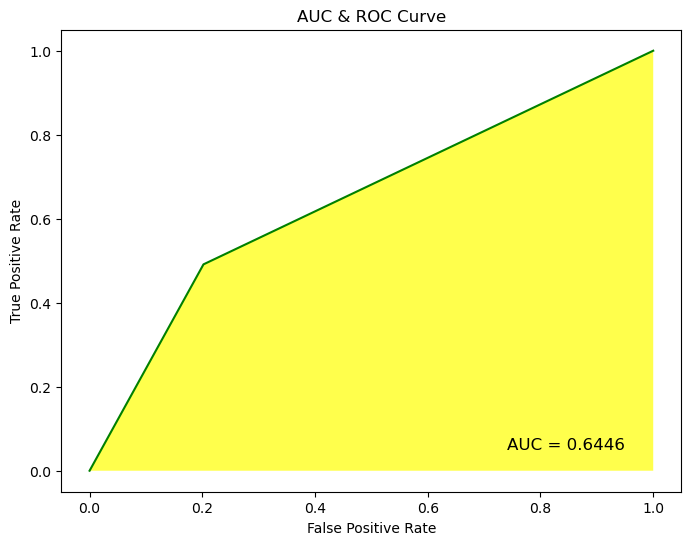

In [16]:
auc = roc_auc_score(ytest, y_pred)

fpr, tpr, threshold = roc_curve(ytest, y_pred)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, 'g')
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

The AUC value of 0.6446 indicates that the model's ability to distinguish between positive and negative classes is moderate, where a higher AUC value indicates better performance.

### Random Forest with Feature Importance and Random Search

#### Feature Importance

Feature ranking:
1. feature 14 (0.006661)
2. feature 1 (0.007728)
3. feature 25 (0.008297)
4. feature 7 (0.009069)
5. feature 0 (0.010447)
6. feature 9 (0.012363)
7. feature 15 (0.012433)
8. feature 16 (0.013090)
9. feature 8 (0.013918)
10. feature 12 (0.014752)
11. feature 3 (0.015641)
12. feature 4 (0.015650)
13. feature 2 (0.015796)
14. feature 21 (0.016135)
15. feature 23 (0.016431)
16. feature 20 (0.017627)
17. feature 17 (0.019835)
18. feature 13 (0.023144)
19. feature 10 (0.025962)
20. feature 24 (0.031872)
21. feature 22 (0.034859)
22. feature 11 (0.044161)
23. feature 6 (0.064255)
24. feature 19 (0.081644)
25. feature 5 (0.181910)
26. feature 18 (0.286321)


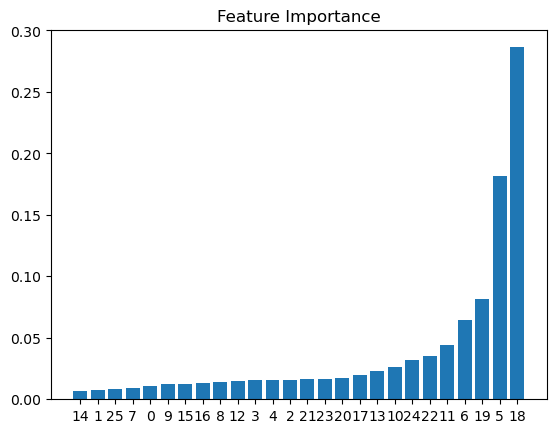

In [17]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::1]
print("Feature ranking:")
for f in range(xtrain.shape[1]):
  print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature Importance")
plt.bar(range(xtrain.shape[1]), importances[indices])
plt.xticks(range(xtrain.shape[1]), indices)
plt.show()

Each feature (or predictor variable) is assigned an importance score based on its contribution to the model's performance. In this case, the features are numbered from 0 to 25, and each feature has a corresponding importance score.

The importance scores are typically normalized so that they sum up to 1. The higher the score, the more important the feature is considered to be in predicting the target variable. Features with higher scores are more influential in the model's decision-making process, while features with lower scores are less influential.

For example, feature 18 has the highest importance score of 0.286321, indicating that it is the most important feature in the model. On the other hand, feature 14 has the lowest importance score of 0.006661, indicating that it is the least important feature in the model.

Overall, this ranking provides insights into which features are most relevant for predicting the target variable, which can be useful for feature selection and model interpretation.

#### Model Building with Feature Importance

In [18]:
important_features = [18, 5, 19, 6, 11, 22, 24]
xtrain_if = xtrain.iloc[:, important_features]
xtest_if = xtest.iloc[:, important_features]

In [19]:
param_grid = {'n_estimators': list(range(2,1000,100)),
              'max_depth': list(range(2, 300, 4)),
              'max_features' : ['sqrt', 'log2', 0.25, 0.50, 0.75, 1],
              'min_samples_split': list(range(2, 100, 4)),
              'min_samples_leaf': list(range(2, 300, 4))}

rfs = RandomForestClassifier()

randoms = RandomizedSearchCV(rfs, param_distributions= param_grid, n_iter = 20,
                             n_jobs = 1, cv = 3, verbose = 10, scoring = 'accuracy')

randoms.fit(xtrain_if, ytrain)

randoms.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3; 1/20] START max_depth=98, max_features=0.25, min_samples_leaf=190, min_samples_split=78, n_estimators=202
[CV 1/3; 1/20] END max_depth=98, max_features=0.25, min_samples_leaf=190, min_samples_split=78, n_estimators=202;, score=0.505 total time=   0.3s
[CV 2/3; 1/20] START max_depth=98, max_features=0.25, min_samples_leaf=190, min_samples_split=78, n_estimators=202
[CV 2/3; 1/20] END max_depth=98, max_features=0.25, min_samples_leaf=190, min_samples_split=78, n_estimators=202;, score=0.502 total time=   0.3s
[CV 3/3; 1/20] START max_depth=98, max_features=0.25, min_samples_leaf=190, min_samples_split=78, n_estimators=202
[CV 3/3; 1/20] END max_depth=98, max_features=0.25, min_samples_leaf=190, min_samples_split=78, n_estimators=202;, score=0.504 total time=   0.3s
[CV 1/3; 2/20] START max_depth=158, max_features=0.5, min_samples_leaf=102, min_samples_split=2, n_estimators=602
[CV 1/3; 2/20] END max_depth=158, max_feat

{'n_estimators': 602,
 'min_samples_split': 46,
 'min_samples_leaf': 26,
 'max_features': 0.75,
 'max_depth': 38}

In [31]:
rfc_best = RandomForestClassifier(n_estimators = 602, max_depth = 38, 
                                  min_samples_split = 46, min_samples_leaf = 26, 
                                  max_features = 0.75, random_state = 70)

rfc_best.fit(xtrain_if, ytrain)

y_pred_if = rfc_best.predict(xtest_if)

#### Model with Feature Importance Evaluation

In [32]:
confusion_matrix(ytest, y_pred_if)

array([[137,  56],
       [ 68, 105]])

In [33]:
accuracy = accuracy_score(ytest, y_pred_if)
precision = precision_score(ytest, y_pred_if)
recall = recall_score(ytest, y_pred_if)
f1 = f1_score(ytest, y_pred_if)

result = {'Evaluation': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
'Result': [accuracy, precision, recall, f1]}

result_df = pd.DataFrame(result)
print(result_df)

  Evaluation    Result
0   Accuracy  0.661202
1  Precision  0.652174
2     Recall  0.606936
3   F1 Score  0.628743


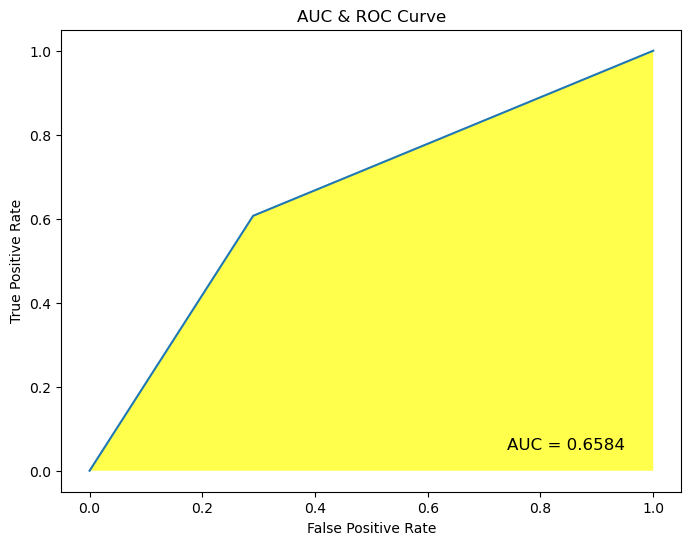

In [34]:
auc = roc_auc_score(ytest, y_pred_if)

fpr, tpr, threshold = roc_curve(ytest, y_pred_if)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor = 'yellow', alpha = 0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

AUC of 0.6584 suggests that the model has some discriminatory ability, but it is not very strong.

### Random Forest with Random Search

#### Random Search

In [24]:
param_grid = {'n_estimators': list(range(100,1000,25)),
              'max_depth': list(range(3, 30, 1)),
              'max_features' : ['sqrt', 'log2', 0.25, 0.50, 0.75, 1],
              'min_samples_split': list(range(2, 30, 1)),
              'min_samples_leaf': list(range(2, 30, 1))}

rfs = RandomForestClassifier()

randoms = RandomizedSearchCV(rfs, param_distributions= param_grid, n_iter = 50,
                             n_jobs = 1, cv = 3, verbose = 10, scoring = 'accuracy', random_state = 10)

randoms.fit(xtrain, ytrain)

randoms.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3; 1/50] START max_depth=14, max_features=0.25, min_samples_leaf=12, min_samples_split=13, n_estimators=975
[CV 1/3; 1/50] END max_depth=14, max_features=0.25, min_samples_leaf=12, min_samples_split=13, n_estimators=975;, score=0.709 total time=   2.9s
[CV 2/3; 1/50] START max_depth=14, max_features=0.25, min_samples_leaf=12, min_samples_split=13, n_estimators=975
[CV 2/3; 1/50] END max_depth=14, max_features=0.25, min_samples_leaf=12, min_samples_split=13, n_estimators=975;, score=0.653 total time=   2.7s
[CV 3/3; 1/50] START max_depth=14, max_features=0.25, min_samples_leaf=12, min_samples_split=13, n_estimators=975
[CV 3/3; 1/50] END max_depth=14, max_features=0.25, min_samples_leaf=12, min_samples_split=13, n_estimators=975;, score=0.655 total time=   3.1s
[CV 1/3; 2/50] START max_depth=24, max_features=log2, min_samples_leaf=6, min_samples_split=28, n_estimators=700
[CV 1/3; 2/50] END max_depth=24, max_features=lo

{'n_estimators': 625,
 'min_samples_split': 5,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': 21}

#### Model Building

In [28]:
rfc_best = RandomForestClassifier(n_estimators = 625, max_depth = 21, 
                                  min_samples_split = 5, min_samples_leaf = 8, 
                                  max_features = 'sqrt', random_state = 70)

rfc_best.fit(xtrain, ytrain)

y_predbest = rfc_best.predict(xtest)

#### Model Evaluation

In [29]:
accuracy = accuracy_score(ytest, y_predbest)
precision = precision_score(ytest, y_predbest)
recall = recall_score(ytest, y_predbest)
f1 = f1_score(ytest, y_predbest)

result = {'Evaluation': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
'Result': [accuracy, precision, recall, f1]}

result_df = pd.DataFrame(result)
print(result_df)

  Evaluation    Result
0   Accuracy  0.702186
1  Precision  0.692771
2     Recall  0.664740
3   F1 Score  0.678466


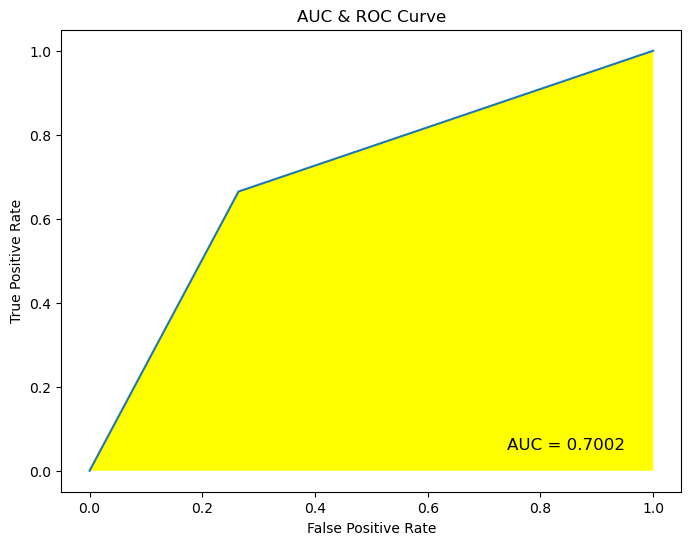

In [30]:
auc = roc_auc_score(ytest, y_predbest)

fpr, tpr, threshold = roc_curve(ytest, y_predbest)

plt.figure(figsize = (8, 6))
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr, facecolor = 'yellow')
plt.text(0.95, 0.05, 'AUC = %0.4f' %auc, ha = 'right', fontsize = 12, color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Conclusion

In this project, I used TOBA stock data to predict stock price trends using the random forest algorithm. The dataset included various features such as Simple Exponential Smoothing (SES) of the adjusted closing price, Moving Average Convergence Divergence (MACD), Relative Strength Index (RSI), and others.

I first built a primary random forest model with default parameters and achieved an accuracy of 65.3%. I then performed feature importance analysis and selected the most important features for a new model. Using these features, I conducted a random search for hyperparameter tuning and built a new random forest model. This model achieved an improved accuracy of 66.1%.

Next, I further optimized the model using a random search with a wider range of hyperparameters. The final random forest model achieved an accuracy of 70.2%, with improved precision, recall, and F1 score compared to the previous models. The AUC of 0.7022 indicates that the model has good discriminatory ability.

Overall, the random forest algorithm shows promise in predicting stock price trends using TOBA stock data. Further fine-tuning and optimization may lead to even better results.